In [770]:
import pandas as pd
import numpy as np

In [771]:
#create admissions data set - admissions.csv
df_admit = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/Hospital Unziped/admissions.csv')
df_admit

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [772]:
#read in drg codes - drgcodes.csv
df_drg = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/Hospital Unziped/drgcodes.csv')
df_drg = df_drg.drop(df_drg[df_drg['drg_type'] == 'HCFA'].index)
df_drg

,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,10000032,22595853,APR,283,OTHER DISORDERS OF THE LIVER,2.0,2.0
2,10000032,22841357,APR,279,HEPATIC COMA & OTHER MAJOR ACUTE LIVER DISORDERS,3.0,2.0
4,10000032,25742920,APR,283,OTHER DISORDERS OF THE LIVER,3.0,2.0
6,10000032,29079034,APR,207,OTHER CIRCULATORY SYSTEM DIAGNOSES,3.0,3.0
8,10000084,23052089,APR,42,DEGENERATIVE NERVOUS SYSTEM DISORDERS EXC MULT...,1.0,1.0
...,...,...,...,...,...,...,...
604366,19999784,29956342,APR,696,OTHER CHEMOTHERAPY,2.0,2.0
604368,19999828,25744818,APR,711,"POST-OP, POST-TRAUMA, OTHER DEVICE INFECTIONS ...",3.0,2.0
604371,19999840,21033226,APR,53,SEIZURE,4.0,4.0
604373,19999840,26071774,APR,45,CVA & PRECEREBRAL OCCLUSION W INFARCT,2.0,1.0


In [773]:
#read in patient data - patients.csv
df_patients = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/Hospital Unziped/patients.csv')
df_patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


In [774]:
#merge dataframes df_admit and df_patients on 'subject_id'
df_main=pd.merge(df_admit, df_patients, on='subject_id')
df_main

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,...,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,F,19,2160,2008 - 2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,...,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0,F,46,2147,2017 - 2019,NaN
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,...,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0,F,46,2147,2017 - 2019,NaN
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,...,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1,M,58,2164,2008 - 2010,2164-09-17
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,...,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0,M,58,2164,2008 - 2010,2164-09-17


In [775]:
#merge dataframes df (main) and df_drg on hadm_id
df_main = pd.merge(df_drg,df_main, on='hadm_id')
df_main

,subject_id_x,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality,subject_id_y,admittime,dischtime,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,22595853,APR,283,OTHER DISORDERS OF THE LIVER,2.0,2.0,10000032,2180-05-06 22:23:00,2180-05-07 17:15:00,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09
1,10000032,22841357,APR,279,HEPATIC COMA & OTHER MAJOR ACUTE LIVER DISORDERS,3.0,2.0,10000032,2180-06-26 18:27:00,2180-06-27 18:49:00,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09
2,10000032,25742920,APR,283,OTHER DISORDERS OF THE LIVER,3.0,2.0,10000032,2180-08-05 23:44:00,2180-08-07 17:50:00,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09
3,10000032,29079034,APR,207,OTHER CIRCULATORY SYSTEM DIAGNOSES,3.0,3.0,10000032,2180-07-23 12:35:00,2180-07-25 17:55:00,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09
4,10000084,23052089,APR,42,DEGENERATIVE NERVOUS SYSTEM DISORDERS EXC MULT...,1.0,1.0,10000084,2160-11-21 01:56:00,2160-11-25 14:52:00,...,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,APR,696,OTHER CHEMOTHERAPY,2.0,2.0,19999784,2121-01-31 00:00:00,2121-02-05 12:44:00,...,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,0,M,57,2119,2017 - 2019,NaN
292418,19999828,25744818,APR,711,"POST-OP, POST-TRAUMA, OTHER DEVICE INFECTIONS ...",3.0,2.0,19999828,2149-01-08 16:44:00,2149-01-18 17:00:00,...,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0,F,46,2147,2017 - 2019,NaN
292419,19999840,21033226,APR,53,SEIZURE,4.0,4.0,19999840,2164-09-10 13:47:00,2164-09-17 13:42:00,...,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1,M,58,2164,2008 - 2010,2164-09-17
292420,19999840,26071774,APR,45,CVA & PRECEREBRAL OCCLUSION W INFARCT,2.0,1.0,19999840,2164-07-25 00:27:00,2164-07-28 12:15:00,...,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0,M,58,2164,2008 - 2010,2164-09-17


In [776]:
#check the column names
df_main.columns

Index(['subject_id_x', 'hadm_id', 'drg_type', 'drg_code', 'description',
       'drg_severity', 'drg_mortality', 'subject_id_y', 'admittime',
       'dischtime', 'deathtime', 'admission_type', 'admit_provider_id',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'marital_status', 'race', 'edregtime', 'edouttime',
       'hospital_expire_flag', 'gender', 'anchor_age', 'anchor_year',
       'anchor_year_group', 'dod'],
      dtype='object')

In [777]:
#creating the new data frame with only certain columns for admission data
df_main_2 = df_main[['subject_id_x','hadm_id','anchor_age','gender','race','insurance','language','marital_status','admission_type','drg_severity','drg_mortality','admission_location','edregtime','edouttime','admittime','dischtime']]
df_main_2

,subject_id_x,hadm_id,anchor_age,gender,race,insurance,language,marital_status,admission_type,drg_severity,drg_mortality,admission_location,edregtime,edouttime,admittime,dischtime
0,10000032,22595853,52,F,WHITE,Other,ENGLISH,WIDOWED,URGENT,2.0,2.0,TRANSFER FROM HOSPITAL,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00
1,10000032,22841357,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00
2,10000032,25742920,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00
3,10000032,29079034,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,3.0,EMERGENCY ROOM,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00
4,10000084,23052089,72,M,WHITE,Medicare,ENGLISH,MARRIED,EW EMER.,1.0,1.0,WALK-IN/SELF REFERRAL,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,M,BLACK/AFRICAN AMERICAN,Medicaid,ENGLISH,SINGLE,ELECTIVE,2.0,2.0,PHYSICIAN REFERRAL,NaN,NaN,2121-01-31 00:00:00,2121-02-05 12:44:00
292418,19999828,25744818,46,F,WHITE,Other,ENGLISH,SINGLE,EW EMER.,3.0,2.0,TRANSFER FROM HOSPITAL,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00
292419,19999840,21033226,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,4.0,4.0,EMERGENCY ROOM,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00
292420,19999840,26071774,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,2.0,1.0,EMERGENCY ROOM,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00


In [778]:
#rename subject_id_x to subject_id
df_main_2 = df_main_2.rename(columns={'subject_id_x' : 'subject_id'})
df_main_2

,subject_id,hadm_id,anchor_age,gender,race,insurance,language,marital_status,admission_type,drg_severity,drg_mortality,admission_location,edregtime,edouttime,admittime,dischtime
0,10000032,22595853,52,F,WHITE,Other,ENGLISH,WIDOWED,URGENT,2.0,2.0,TRANSFER FROM HOSPITAL,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00
1,10000032,22841357,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00
2,10000032,25742920,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00
3,10000032,29079034,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,3.0,EMERGENCY ROOM,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00
4,10000084,23052089,72,M,WHITE,Medicare,ENGLISH,MARRIED,EW EMER.,1.0,1.0,WALK-IN/SELF REFERRAL,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,M,BLACK/AFRICAN AMERICAN,Medicaid,ENGLISH,SINGLE,ELECTIVE,2.0,2.0,PHYSICIAN REFERRAL,NaN,NaN,2121-01-31 00:00:00,2121-02-05 12:44:00
292418,19999828,25744818,46,F,WHITE,Other,ENGLISH,SINGLE,EW EMER.,3.0,2.0,TRANSFER FROM HOSPITAL,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00
292419,19999840,21033226,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,4.0,4.0,EMERGENCY ROOM,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00
292420,19999840,26071774,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,2.0,1.0,EMERGENCY ROOM,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00


In [779]:
#check the data types
df_main_2.dtypes

subject_id              int64
hadm_id                 int64
anchor_age              int64
gender                 object
race                   object
insurance              object
language               object
marital_status         object
admission_type         object
drg_severity          float64
drg_mortality         float64
admission_location     object
edregtime              object
edouttime              object
admittime              object
dischtime              object
dtype: object

In [780]:
#create the LOS time by subtracting two date types from each other
df_main_2['admittime'] = df_main_2['admittime'].astype('datetime64')
df_main_2['dischtime'] = df_main_2['dischtime'].astype('datetime64')

In [781]:
#now subtract from eachother
df_main_2['length_of_stay'] = df_main_2['dischtime'] - df_main_2['admittime']

In [782]:
#check the output
df_main_2

,subject_id,hadm_id,anchor_age,gender,race,insurance,language,marital_status,admission_type,drg_severity,drg_mortality,admission_location,edregtime,edouttime,admittime,dischtime,length_of_stay
0,10000032,22595853,52,F,WHITE,Other,ENGLISH,WIDOWED,URGENT,2.0,2.0,TRANSFER FROM HOSPITAL,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00
1,10000032,22841357,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00
2,10000032,25742920,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00
3,10000032,29079034,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,3.0,EMERGENCY ROOM,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00
4,10000084,23052089,72,M,WHITE,Medicare,ENGLISH,MARRIED,EW EMER.,1.0,1.0,WALK-IN/SELF REFERRAL,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,M,BLACK/AFRICAN AMERICAN,Medicaid,ENGLISH,SINGLE,ELECTIVE,2.0,2.0,PHYSICIAN REFERRAL,NaN,NaN,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00
292418,19999828,25744818,46,F,WHITE,Other,ENGLISH,SINGLE,EW EMER.,3.0,2.0,TRANSFER FROM HOSPITAL,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00
292419,19999840,21033226,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,4.0,4.0,EMERGENCY ROOM,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00
292420,19999840,26071774,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,2.0,1.0,EMERGENCY ROOM,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00


In [783]:
#now change the timedelta to just hours
df_main_2['length_of_stay_hours'] = df_main_2['length_of_stay'].dt.total_seconds()/3600
df_main_2

,subject_id,hadm_id,anchor_age,gender,race,insurance,language,marital_status,admission_type,drg_severity,drg_mortality,admission_location,edregtime,edouttime,admittime,dischtime,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,F,WHITE,Other,ENGLISH,WIDOWED,URGENT,2.0,2.0,TRANSFER FROM HOSPITAL,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,18.866667
1,10000032,22841357,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,24.366667
2,10000032,25742920,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,42.100000
3,10000032,29079034,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,3.0,EMERGENCY ROOM,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,53.333333
4,10000084,23052089,72,M,WHITE,Medicare,ENGLISH,MARRIED,EW EMER.,1.0,1.0,WALK-IN/SELF REFERRAL,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,M,BLACK/AFRICAN AMERICAN,Medicaid,ENGLISH,SINGLE,ELECTIVE,2.0,2.0,PHYSICIAN REFERRAL,NaN,NaN,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,132.733333
292418,19999828,25744818,46,F,WHITE,Other,ENGLISH,SINGLE,EW EMER.,3.0,2.0,TRANSFER FROM HOSPITAL,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,240.266667
292419,19999840,21033226,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,4.0,4.0,EMERGENCY ROOM,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,167.916667
292420,19999840,26071774,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,2.0,1.0,EMERGENCY ROOM,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,83.800000


In [784]:
#create the time_spent_in_emergency_dpt time by subtracting edregtime from edouttime
df_main_2['edregtime'] = df_main_2['edregtime'].astype('datetime64')
df_main_2['edouttime'] = df_main_2['edouttime'].astype('datetime64')

df_main_2['time_in_emergency_dpt'] = df_main_2['edouttime'] - df_main_2['edregtime']
df_main_2

,subject_id,hadm_id,anchor_age,gender,race,insurance,language,marital_status,admission_type,drg_severity,drg_mortality,admission_location,edregtime,edouttime,admittime,dischtime,length_of_stay,length_of_stay_hours,time_in_emergency_dpt
0,10000032,22595853,52,F,WHITE,Other,ENGLISH,WIDOWED,URGENT,2.0,2.0,TRANSFER FROM HOSPITAL,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,18.866667,0 days 04:13:00
1,10000032,22841357,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,24.366667,0 days 05:37:00
2,10000032,25742920,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,42.100000,0 days 04:46:00
3,10000032,29079034,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,3.0,EMERGENCY ROOM,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,53.333333,0 days 08:06:00
4,10000084,23052089,72,M,WHITE,Medicare,ENGLISH,MARRIED,EW EMER.,1.0,1.0,WALK-IN/SELF REFERRAL,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,108.933333,0 days 06:44:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,M,BLACK/AFRICAN AMERICAN,Medicaid,ENGLISH,SINGLE,ELECTIVE,2.0,2.0,PHYSICIAN REFERRAL,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,132.733333,NaT
292418,19999828,25744818,46,F,WHITE,Other,ENGLISH,SINGLE,EW EMER.,3.0,2.0,TRANSFER FROM HOSPITAL,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,240.266667,0 days 09:01:00
292419,19999840,21033226,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,4.0,4.0,EMERGENCY ROOM,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,167.916667,0 days 03:37:00
292420,19999840,26071774,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,2.0,1.0,EMERGENCY ROOM,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,83.800000,0 days 04:04:00


In [785]:
#now determin the hours that correlates with time_in_emergency_dpt - creating time_in_emergency_dpt_hours
df_main_2['time_in_emergency_dpt_hours'] = df_main_2['time_in_emergency_dpt'].dt.total_seconds()/3600
df_main_2

,subject_id,hadm_id,anchor_age,gender,race,insurance,language,marital_status,admission_type,drg_severity,drg_mortality,admission_location,edregtime,edouttime,admittime,dischtime,length_of_stay,length_of_stay_hours,time_in_emergency_dpt,time_in_emergency_dpt_hours
0,10000032,22595853,52,F,WHITE,Other,ENGLISH,WIDOWED,URGENT,2.0,2.0,TRANSFER FROM HOSPITAL,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,18.866667,0 days 04:13:00,4.216667
1,10000032,22841357,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,24.366667,0 days 05:37:00,5.616667
2,10000032,25742920,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,2.0,EMERGENCY ROOM,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,42.100000,0 days 04:46:00,4.766667
3,10000032,29079034,52,F,WHITE,Medicaid,ENGLISH,WIDOWED,EW EMER.,3.0,3.0,EMERGENCY ROOM,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,53.333333,0 days 08:06:00,8.100000
4,10000084,23052089,72,M,WHITE,Medicare,ENGLISH,MARRIED,EW EMER.,1.0,1.0,WALK-IN/SELF REFERRAL,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,108.933333,0 days 06:44:00,6.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,M,BLACK/AFRICAN AMERICAN,Medicaid,ENGLISH,SINGLE,ELECTIVE,2.0,2.0,PHYSICIAN REFERRAL,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,132.733333,NaT,NaN
292418,19999828,25744818,46,F,WHITE,Other,ENGLISH,SINGLE,EW EMER.,3.0,2.0,TRANSFER FROM HOSPITAL,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,240.266667,0 days 09:01:00,9.016667
292419,19999840,21033226,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,4.0,4.0,EMERGENCY ROOM,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,167.916667,0 days 03:37:00,3.616667
292420,19999840,26071774,58,M,WHITE,Other,ENGLISH,WIDOWED,EW EMER.,2.0,1.0,EMERGENCY ROOM,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,83.800000,0 days 04:04:00,4.066667


In [786]:
#return the columns in df_main_2
df_main_2.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'gender', 'race', 'insurance',
       'language', 'marital_status', 'admission_type', 'drg_severity',
       'drg_mortality', 'admission_location', 'edregtime', 'edouttime',
       'admittime', 'dischtime', 'length_of_stay', 'length_of_stay_hours',
       'time_in_emergency_dpt', 'time_in_emergency_dpt_hours'],
      dtype='object')

In [787]:
#binary encode
df_main_3 = pd.get_dummies(df_main_2, columns = ['gender','race','insurance','language','marital_status','admission_type','admission_location'], drop_first = True)
df_main_3

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,edregtime,edouttime,admittime,dischtime,length_of_stay,...,admission_location_CLINIC REFERRAL,admission_location_EMERGENCY ROOM,admission_location_INFORMATION NOT AVAILABLE,admission_location_INTERNAL TRANSFER TO OR FROM PSYCH,admission_location_PACU,admission_location_PHYSICIAN REFERRAL,admission_location_PROCEDURE SITE,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL
0,10000032,22595853,52,2.0,2.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,...,0,0,0,0,0,0,0,1,0,0
1,10000032,22841357,52,3.0,2.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,...,0,1,0,0,0,0,0,0,0,0
2,10000032,25742920,52,3.0,2.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,...,0,1,0,0,0,0,0,0,0,0
3,10000032,29079034,52,3.0,3.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,...,0,1,0,0,0,0,0,0,0,0
4,10000084,23052089,72,1.0,1.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,...,0,0,0,0,0,1,0,0,0,0
292418,19999828,25744818,46,3.0,2.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,...,0,0,0,0,0,0,0,1,0,0
292419,19999840,21033226,58,4.0,4.0,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,...,0,1,0,0,0,0,0,0,0,0
292420,19999840,26071774,58,2.0,1.0,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,...,0,1,0,0,0,0,0,0,0,0


In [788]:
 #fill the 'NULL' values for 'time_in_emergency_dpt_hours' and 'edreg/outtime' = 0, bc if it is empty that means that they spent no time in emergency department
df_main_3['time_in_emergency_dpt_hours'] = df_main_3['time_in_emergency_dpt_hours'].fillna(0)

In [789]:
df_main_3

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,edregtime,edouttime,admittime,dischtime,length_of_stay,...,admission_location_CLINIC REFERRAL,admission_location_EMERGENCY ROOM,admission_location_INFORMATION NOT AVAILABLE,admission_location_INTERNAL TRANSFER TO OR FROM PSYCH,admission_location_PACU,admission_location_PHYSICIAN REFERRAL,admission_location_PROCEDURE SITE,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL
0,10000032,22595853,52,2.0,2.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,...,0,0,0,0,0,0,0,1,0,0
1,10000032,22841357,52,3.0,2.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,...,0,1,0,0,0,0,0,0,0,0
2,10000032,25742920,52,3.0,2.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,...,0,1,0,0,0,0,0,0,0,0
3,10000032,29079034,52,3.0,3.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,...,0,1,0,0,0,0,0,0,0,0
4,10000084,23052089,72,1.0,1.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,...,0,0,0,0,0,1,0,0,0,0
292418,19999828,25744818,46,3.0,2.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,...,0,0,0,0,0,0,0,1,0,0
292419,19999840,21033226,58,4.0,4.0,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,...,0,1,0,0,0,0,0,0,0,0
292420,19999840,26071774,58,2.0,1.0,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,...,0,1,0,0,0,0,0,0,0,0


Bin 'admit-edout'

In [790]:
#find diffrence in time from admit time to time leaving the emergency department
df_main_3['admit-edout'] = df_main_3['admittime'] - df_main_3['edouttime']
df_main_3['admit-edout'] = df_main_3['admit-edout'].dt.total_seconds()/3600
df_main_3['admit-edout'].describe()

count    192063.000000
mean         -2.308205
std           4.317614
min        -150.116667
25%          -2.116667
50%          -1.516667
75%          -1.116667
max          46.966667
Name: admit-edout, dtype: float64

In [791]:
print('Number of NULL values in admit-edout:',df_main_3['admit-edout'].isnull().sum())

Number of NULL values in admit-edout: 100359


In [792]:
#create new variablesfor 'admit-edout'
df_main_3['admit-edout_no_time_in_ED'] = np.where(df_main_3['admit-edout'].isnull(), 1, 0)
df_main_3['admit-edout_negitive_time'] = np.where(df_main_3['admit-edout']<0,df_main_3['admit-edout'],np.nan)
df_main_3['admit-edout_same_time'] = np.where(df_main_3['admit-edout']==0,df_main_3['admit-edout'],np.nan)
df_main_3['admit-edout_positive_time'] = np.where(df_main_3['admit-edout']>0,df_main_3['admit-edout'],np.nan)

In [793]:
import seaborn as sns

<Axes: xlabel='admit-edout', ylabel='Count'>

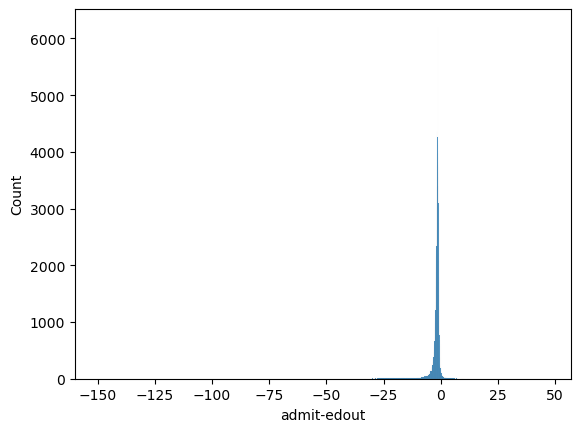

In [794]:
#graph the data for the 'admit-edout'
sns.histplot(data=df_main_3, x=df_main_3['admit-edout'])

Number of patients who spent no time in the ED: 100359


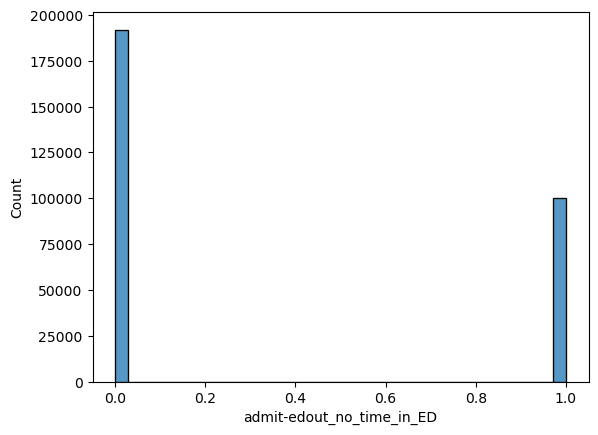

In [795]:
#graph the data for the 'admit-edout_no_time_in_ED'
sns.histplot(data=df_main_3, x=df_main_3['admit-edout_no_time_in_ED'])
print('Number of patients who spent no time in the ED:', df_main_3['admit-edout_no_time_in_ED'].sum())

<Axes: xlabel='admit-edout_negitive_time', ylabel='Count'>

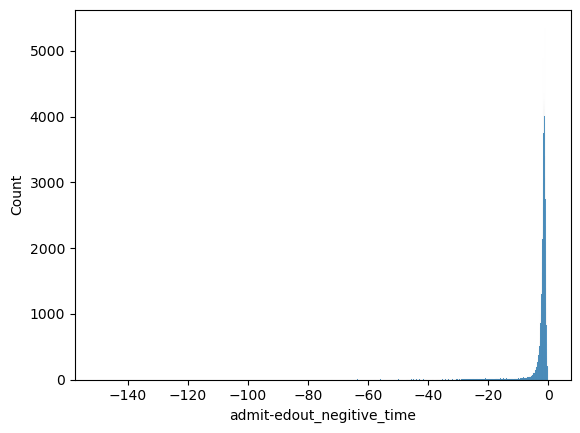

In [796]:
#graph the data for the 'admit-edout_negitive_time'
sns.histplot(data=df_main_3, x=df_main_3['admit-edout_negitive_time'])

<Axes: xlabel='admit-edout_same_time', ylabel='Count'>

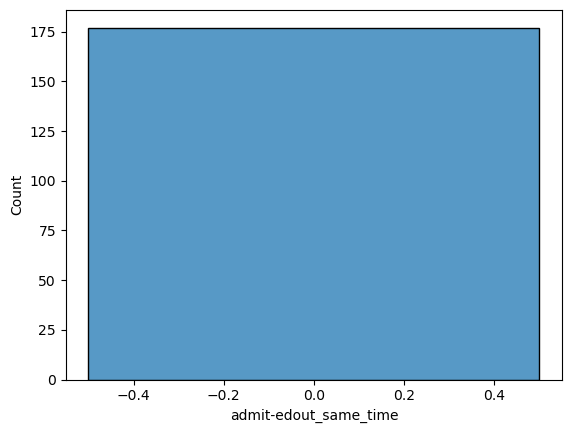

In [797]:
#graph the data for the 'admit-edout_same_time'
sns.histplot(data=df_main_3, x=df_main_3['admit-edout_same_time'])

<Axes: xlabel='admit-edout_positive_time', ylabel='Count'>

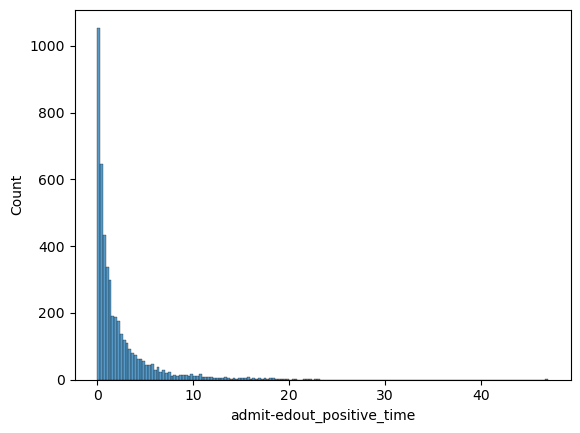

In [798]:
#graph the data for the 'admit-edout_positive_time'
sns.histplot(data=df_main_3, x=df_main_3['admit-edout_positive_time'])

<Axes: xlabel='admit-edout_negitive_time', ylabel='Count'>

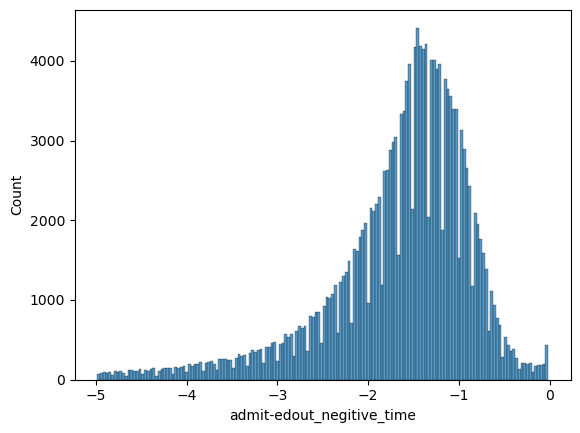

In [799]:
#graph the data for the 'admit-edout_negitive_time' > n
sns.histplot(data=df_main_3[df_main_3['admit-edout_negitive_time'] > -5], x='admit-edout_negitive_time')

<Axes: xlabel='admit-edout_positive_time', ylabel='Count'>

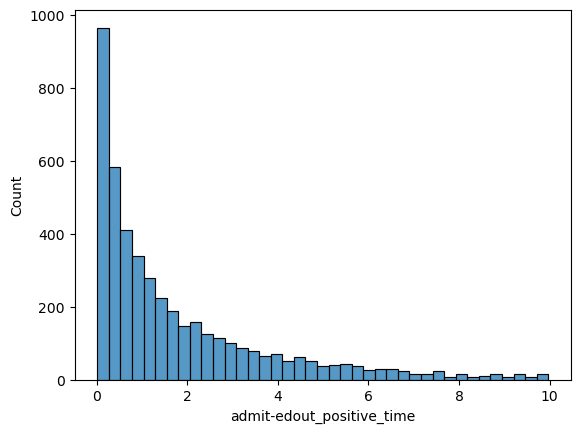

In [800]:
#graph the data for the 'admit-edout_positive_time' < n
sns.histplot(data=df_main_3[df_main_3['admit-edout_positive_time'] < 10], x='admit-edout_positive_time')

In [801]:
df_main_3['admit-edout'].describe()

count    192063.000000
mean         -2.308205
std           4.317614
min        -150.116667
25%          -2.116667
50%          -1.516667
75%          -1.116667
max          46.966667
Name: admit-edout, dtype: float64

In [802]:
#bin the 'admit-edout' into catigorical variables
bin_edges = [-155, -0.001,0.001, 55]  # Define the edges of the bins
bin_labels = ['admit_before_leaving_ED', 'admit_as_leaving_ED', 'observation']  # Define the labels for each bin

# Bin the 'Age' column into categories
df_main_3['admit-edout_categories'] = pd.cut(df_main_3['admit-edout'], bins=bin_edges, labels=bin_labels)

In [803]:
#fill_na='spent_no_time_in_ED'
new_category_label = 'spent_no_time_in_ED'
df_main_3['admit-edout_categories'] = df_main_3['admit-edout_categories'].cat.add_categories(new_category_label)

# Replace null values with the new category label
df_main_3['admit-edout_categories'].fillna(new_category_label, inplace=True)


In [804]:
#bin the 'admit-edout' into catigorical variables
category_counts = df_main_3['admit-edout_categories'].value_counts(dropna=False)
category_counts

admit_before_leaving_ED    187177
spent_no_time_in_ED        100359
observation                  4709
admit_as_leaving_ED           177
Name: admit-edout_categories, dtype: int64

In [805]:
#bin with four quartiles for a new feature
df_main_3['admit-edout_categories_quartiles'] = pd.qcut(df_main_3['admit-edout'], q=4, labels=['q1','q2','q3','q4'])

In [806]:
#fill_na='spent_no_time_in_ED'
new_category_label = 'spent_no_time_in_ED'
df_main_3['admit-edout_categories_quartiles'] = df_main_3['admit-edout_categories_quartiles'].cat.add_categories(new_category_label)

# Replace null values with the new category label
df_main_3['admit-edout_categories_quartiles'].fillna(new_category_label, inplace=True)


In [807]:
#check new variable
df_main_3['admit-edout_categories_quartiles']
#bin the 'admit-edout' into catigorical variables
category_counts = df_main_3['admit-edout_categories_quartiles'].value_counts(dropna=False)
category_counts

spent_no_time_in_ED    100359
q2                      48841
q1                      48410
q3                      48382
q4                      46430
Name: admit-edout_categories_quartiles, dtype: int64

In [808]:
#analize the admission_type for each 'admit-edout'

# Selecting only the necessary columns from df_main
df_main_subset = df_main[['hadm_id', 'admission_type']]
# Merging df_main_3 with df_main_subset on 'hadm_id'
df_main_3 = pd.merge(df_main_3, df_main_subset, on='hadm_id')
df_main_3

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,edregtime,edouttime,admittime,dischtime,length_of_stay,...,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,admit-edout,admit-edout_no_time_in_ED,admit-edout_negitive_time,admit-edout_same_time,admit-edout_positive_time,admit-edout_categories,admit-edout_categories_quartiles,admission_type
0,10000032,22595853,52,2.0,2.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,...,0,0,-1.116667,0,-1.116667,NaN,NaN,admit_before_leaving_ED,q3,URGENT
1,10000032,22841357,52,3.0,2.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,...,0,0,-3.066667,0,-3.066667,NaN,NaN,admit_before_leaving_ED,q1,EW EMER.
2,10000032,25742920,52,3.0,2.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,...,0,0,-2.000000,0,-2.000000,NaN,NaN,admit_before_leaving_ED,q2,EW EMER.
3,10000032,29079034,52,3.0,3.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,...,0,0,-1.416667,0,-1.416667,NaN,NaN,admit_before_leaving_ED,q3,EW EMER.
4,10000084,23052089,72,1.0,1.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,...,0,1,-1.400000,0,-1.400000,NaN,NaN,admit_before_leaving_ED,q3,EW EMER.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,...,0,0,NaN,1,NaN,NaN,NaN,spent_no_time_in_ED,spent_no_time_in_ED,ELECTIVE
292418,19999828,25744818,46,3.0,2.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,...,0,0,-1.466667,0,-1.466667,NaN,NaN,admit_before_leaving_ED,q3,EW EMER.
292419,19999840,21033226,58,4.0,4.0,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,...,0,0,-0.983333,0,-0.983333,NaN,NaN,admit_before_leaving_ED,q4,EW EMER.
292420,19999840,26071774,58,2.0,1.0,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,...,0,0,-0.883333,0,-0.883333,NaN,NaN,admit_before_leaving_ED,q4,EW EMER.


In [809]:
#rename and delete the duplicates
df_main_3.rename(columns={'admission_type_x': 'admission_type'}, inplace=True)
df_main_3

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,edregtime,edouttime,admittime,dischtime,length_of_stay,...,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,admit-edout,admit-edout_no_time_in_ED,admit-edout_negitive_time,admit-edout_same_time,admit-edout_positive_time,admit-edout_categories,admit-edout_categories_quartiles,admission_type
0,10000032,22595853,52,2.0,2.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,...,0,0,-1.116667,0,-1.116667,NaN,NaN,admit_before_leaving_ED,q3,URGENT
1,10000032,22841357,52,3.0,2.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,...,0,0,-3.066667,0,-3.066667,NaN,NaN,admit_before_leaving_ED,q1,EW EMER.
2,10000032,25742920,52,3.0,2.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,...,0,0,-2.000000,0,-2.000000,NaN,NaN,admit_before_leaving_ED,q2,EW EMER.
3,10000032,29079034,52,3.0,3.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,...,0,0,-1.416667,0,-1.416667,NaN,NaN,admit_before_leaving_ED,q3,EW EMER.
4,10000084,23052089,72,1.0,1.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,4 days 12:56:00,...,0,1,-1.400000,0,-1.400000,NaN,NaN,admit_before_leaving_ED,q3,EW EMER.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,...,0,0,NaN,1,NaN,NaN,NaN,spent_no_time_in_ED,spent_no_time_in_ED,ELECTIVE
292418,19999828,25744818,46,3.0,2.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,...,0,0,-1.466667,0,-1.466667,NaN,NaN,admit_before_leaving_ED,q3,EW EMER.
292419,19999840,21033226,58,4.0,4.0,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,6 days 23:55:00,...,0,0,-0.983333,0,-0.983333,NaN,NaN,admit_before_leaving_ED,q4,EW EMER.
292420,19999840,26071774,58,2.0,1.0,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,...,0,0,-0.883333,0,-0.883333,NaN,NaN,admit_before_leaving_ED,q4,EW EMER.


In [810]:
df_main_3.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
       'edregtime', 'edouttime', 'admittime', 'dischtime', 'length_of_stay',
       'length_of_stay_hours', 'time_in_emergency_dpt',
       'time_in_emergency_dpt_hours', 'gender_M', 'race_ASIAN',
       'race_ASIAN - ASIAN INDIAN', 'race_ASIAN - CHINESE',
       'race_ASIAN - KOREAN', 'race_ASIAN - SOUTH EAST ASIAN',
       'race_BLACK/AFRICAN', 'race_BLACK/AFRICAN AMERICAN',
       'race_BLACK/CAPE VERDEAN', 'race_BLACK/CARIBBEAN ISLAND',
       'race_HISPANIC OR LATINO', 'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
       'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC 

In [811]:
#change the order of my columns
# Define the new order of columns
new_column_order = [
    'subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
    'edregtime', 'edouttime', 'admittime', 'dischtime',
    'admission_type',
    'admit-edout', 'admit-edout_no_time_in_ED', 'admit-edout_negitive_time',
    'admit-edout_same_time', 'admit-edout_positive_time',
    'admit-edout_categories', 'admit-edout_categories_quartiles',
    'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN', 'race_ASIAN - CHINESE',
    'race_ASIAN - KOREAN', 'race_ASIAN - SOUTH EAST ASIAN',
    'race_BLACK/AFRICAN', 'race_BLACK/AFRICAN AMERICAN',
    'race_BLACK/CAPE VERDEAN', 'race_BLACK/CARIBBEAN ISLAND',
    'race_HISPANIC OR LATINO', 'race_HISPANIC/LATINO - CENTRAL AMERICAN',
    'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
    'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
    'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
    'race_HISPANIC/LATINO - PUERTO RICAN',
    'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
    'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
    'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
    'race_SOUTH AMERICAN', 'race_UNABLE TO OBTAIN', 'race_UNKNOWN',
    'race_WHITE', 'race_WHITE - BRAZILIAN', 'race_WHITE - EASTERN EUROPEAN',
    'race_WHITE - OTHER EUROPEAN', 'race_WHITE - RUSSIAN',
    'insurance_Medicare', 'insurance_Other', 'language_ENGLISH',
    'marital_status_MARRIED', 'marital_status_SINGLE',
    'marital_status_WIDOWED',
    'admission_type_DIRECT EMER.',
    'admission_type_DIRECT OBSERVATION', 'admission_type_ELECTIVE',
    'admission_type_EU OBSERVATION', 'admission_type_EW EMER.',
    'admission_type_OBSERVATION ADMIT',
    'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT',
    'admission_location_CLINIC REFERRAL',
    'admission_location_EMERGENCY ROOM',
    'admission_location_INFORMATION NOT AVAILABLE',
    'admission_location_INTERNAL TRANSFER TO OR FROM PSYCH',
    'admission_location_PACU', 'admission_location_PHYSICIAN REFERRAL',
    'admission_location_PROCEDURE SITE',
    'admission_location_TRANSFER FROM HOSPITAL',
    'admission_location_TRANSFER FROM SKILLED NURSING FACILITY',
    'admission_location_WALK-IN/SELF REFERRAL',
    'length_of_stay', 'length_of_stay_hours'
]

# Reorder the columns in the DataFrame
df_final_base = df_main_3[new_column_order]
df_final_base

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,edregtime,edouttime,admittime,dischtime,admission_type,...,admission_location_INFORMATION NOT AVAILABLE,admission_location_INTERNAL TRANSFER TO OR FROM PSYCH,admission_location_PACU,admission_location_PHYSICIAN REFERRAL,admission_location_PROCEDURE SITE,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,2.0,2.0,2180-05-06 19:17:00,2180-05-06 23:30:00,2180-05-06 22:23:00,2180-05-07 17:15:00,URGENT,...,0,0,0,0,0,1,0,0,0 days 18:52:00,18.866667
1,10000032,22841357,52,3.0,2.0,2180-06-26 15:54:00,2180-06-26 21:31:00,2180-06-26 18:27:00,2180-06-27 18:49:00,EW EMER.,...,0,0,0,0,0,0,0,0,1 days 00:22:00,24.366667
2,10000032,25742920,52,3.0,2.0,2180-08-05 20:58:00,2180-08-06 01:44:00,2180-08-05 23:44:00,2180-08-07 17:50:00,EW EMER.,...,0,0,0,0,0,0,0,0,1 days 18:06:00,42.100000
3,10000032,29079034,52,3.0,3.0,2180-07-23 05:54:00,2180-07-23 14:00:00,2180-07-23 12:35:00,2180-07-25 17:55:00,EW EMER.,...,0,0,0,0,0,0,0,0,2 days 05:20:00,53.333333
4,10000084,23052089,72,1.0,1.0,2160-11-20 20:36:00,2160-11-21 03:20:00,2160-11-21 01:56:00,2160-11-25 14:52:00,EW EMER.,...,0,0,0,0,0,0,0,1,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,NaT,NaT,2121-01-31 00:00:00,2121-02-05 12:44:00,ELECTIVE,...,0,0,0,1,0,0,0,0,5 days 12:44:00,132.733333
292418,19999828,25744818,46,3.0,2.0,2149-01-08 09:11:00,2149-01-08 18:12:00,2149-01-08 16:44:00,2149-01-18 17:00:00,EW EMER.,...,0,0,0,0,0,1,0,0,10 days 00:16:00,240.266667
292419,19999840,21033226,58,4.0,4.0,2164-09-10 11:09:00,2164-09-10 14:46:00,2164-09-10 13:47:00,2164-09-17 13:42:00,EW EMER.,...,0,0,0,0,0,0,0,0,6 days 23:55:00,167.916667
292420,19999840,26071774,58,2.0,1.0,2164-07-24 21:16:00,2164-07-25 01:20:00,2164-07-25 00:27:00,2164-07-28 12:15:00,EW EMER.,...,0,0,0,0,0,0,0,0,3 days 11:48:00,83.800000


In [812]:
#now write out the data set using to_csv
df_final_base.to_csv('/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Base_Data_Set.csv', index = False)

In [813]:
#now time to refine this data set, drop unnessisary columns and binary encode the rest of the catigorical variables
df_final_base.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
       'edregtime', 'edouttime', 'admittime', 'dischtime', 'admission_type',
       'admit-edout', 'admit-edout_no_time_in_ED', 'admit-edout_negitive_time',
       'admit-edout_same_time', 'admit-edout_positive_time',
       'admit-edout_categories', 'admit-edout_categories_quartiles',
       'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN',
       'race_ASIAN - CHINESE', 'race_ASIAN - KOREAN',
       'race_ASIAN - SOUTH EAST ASIAN', 'race_BLACK/AFRICAN',
       'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN',
       'race_BLACK/CARIBBEAN ISLAND', 'race_HISPANIC OR LATINO',
       'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
       'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',

In [814]:
# Define the columns to drop
columns_to_drop = ['edregtime','edouttime','admittime','dischtime','admission_type','admit-edout','admit-edout_no_time_in_ED','admit-edout_negitive_time','admit-edout_same_time','admit-edout_positive_time']

# Drop the specified columns
df_final_refined = df_final_base.drop(columns=columns_to_drop)

In [815]:
df_final_refined

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,admit-edout_categories,admit-edout_categories_quartiles,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,...,admission_location_INFORMATION NOT AVAILABLE,admission_location_INTERNAL TRANSFER TO OR FROM PSYCH,admission_location_PACU,admission_location_PHYSICIAN REFERRAL,admission_location_PROCEDURE SITE,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,2.0,2.0,admit_before_leaving_ED,q3,0,0,0,...,0,0,0,0,0,1,0,0,0 days 18:52:00,18.866667
1,10000032,22841357,52,3.0,2.0,admit_before_leaving_ED,q1,0,0,0,...,0,0,0,0,0,0,0,0,1 days 00:22:00,24.366667
2,10000032,25742920,52,3.0,2.0,admit_before_leaving_ED,q2,0,0,0,...,0,0,0,0,0,0,0,0,1 days 18:06:00,42.100000
3,10000032,29079034,52,3.0,3.0,admit_before_leaving_ED,q3,0,0,0,...,0,0,0,0,0,0,0,0,2 days 05:20:00,53.333333
4,10000084,23052089,72,1.0,1.0,admit_before_leaving_ED,q3,1,0,0,...,0,0,0,0,0,0,0,1,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,spent_no_time_in_ED,spent_no_time_in_ED,1,0,0,...,0,0,0,1,0,0,0,0,5 days 12:44:00,132.733333
292418,19999828,25744818,46,3.0,2.0,admit_before_leaving_ED,q3,0,0,0,...,0,0,0,0,0,1,0,0,10 days 00:16:00,240.266667
292419,19999840,21033226,58,4.0,4.0,admit_before_leaving_ED,q4,1,0,0,...,0,0,0,0,0,0,0,0,6 days 23:55:00,167.916667
292420,19999840,26071774,58,2.0,1.0,admit_before_leaving_ED,q4,1,0,0,...,0,0,0,0,0,0,0,0,3 days 11:48:00,83.800000


In [816]:
#binary encode
df_final_refined = pd.get_dummies(df_final_refined, columns = ['admit-edout_categories','admit-edout_categories_quartiles'], drop_first = True)
df_final_refined.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
       'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN',
       'race_ASIAN - CHINESE', 'race_ASIAN - KOREAN',
       'race_ASIAN - SOUTH EAST ASIAN', 'race_BLACK/AFRICAN',
       'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN',
       'race_BLACK/CARIBBEAN ISLAND', 'race_HISPANIC OR LATINO',
       'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
       'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
       'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
       'race_SOUTH AMERICAN', 'race_UNABLE TO OBTAIN', 'race_UNKNOWN',
       

In [817]:
# Define the desired column order
desired_column_order = [
    'subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
    'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN',
    'race_ASIAN - CHINESE', 'race_ASIAN - KOREAN',
    'race_ASIAN - SOUTH EAST ASIAN', 'race_BLACK/AFRICAN',
    'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN',
    'race_BLACK/CARIBBEAN ISLAND', 'race_HISPANIC OR LATINO',
    'race_HISPANIC/LATINO - CENTRAL AMERICAN',
    'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
    'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
    'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
    'race_HISPANIC/LATINO - PUERTO RICAN',
    'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
    'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
    'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
    'race_SOUTH AMERICAN', 'race_UNABLE TO OBTAIN', 'race_UNKNOWN',
    'race_WHITE', 'race_WHITE - BRAZILIAN', 'race_WHITE - EASTERN EUROPEAN',
    'race_WHITE - OTHER EUROPEAN', 'race_WHITE - RUSSIAN',
    'insurance_Medicare', 'insurance_Other', 'language_ENGLISH',
    'marital_status_MARRIED', 'marital_status_SINGLE',
    'marital_status_WIDOWED', 'admission_type_DIRECT EMER.',
    'admission_type_DIRECT OBSERVATION', 'admission_type_ELECTIVE',
    'admission_type_EU OBSERVATION', 'admission_type_EW EMER.',
    'admission_type_OBSERVATION ADMIT',
    'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT',
    'admission_location_CLINIC REFERRAL',
    'admission_location_EMERGENCY ROOM',
    'admission_location_INFORMATION NOT AVAILABLE',
    'admission_location_INTERNAL TRANSFER TO OR FROM PSYCH',
    'admission_location_PACU', 'admission_location_PHYSICIAN REFERRAL',
    'admission_location_PROCEDURE SITE',
    'admission_location_TRANSFER FROM HOSPITAL',
    'admission_location_TRANSFER FROM SKILLED NURSING FACILITY',
    'admission_location_WALK-IN/SELF REFERRAL',
    'admit-edout_categories_admit_as_leaving_ED',
    'admit-edout_categories_observation',
    'admit-edout_categories_spent_no_time_in_ED',
    'admit-edout_categories_quartiles_q2',
    'admit-edout_categories_quartiles_q3',
    'admit-edout_categories_quartiles_q4',
    'admit-edout_categories_quartiles_spent_no_time_in_ED',
    'length_of_stay', 'length_of_stay_hours'
]

# Reorder the columns in the DataFrame
df_final_refined = df_final_refined[desired_column_order]

In [818]:
#now write out the data set using to_csv
df_final_refined.to_csv('/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Refined_Data_Set.csv', index = False)